# Credit Card Marketing Strategy

By Naeemah Small      

12/07/2017

# Credit Cards 

A credit card is a payment card issued to users (cardholders) to enable the cardholder to pay a merchant for goods and services based on the cardholder's promise to the card issuer to pay them for the amounts so paid plus the other agreed charges.The card issuer (usually a bank) creates a revolving account and grants a line of credit to the cardholder, from which the cardholder can borrow money for payment to a merchant or as a cash advance. In other words, credit cards combine payment services with extensions of credit. Complex fee structures in the credit card industry may limit customers' ability to comparison shop, help ensure that the industry is not price-competitive and help maximize industry profits. Because of this, legislatures have regulated credit card fees.

Information: https://en.wikipedia.org/wiki/Credit_card

Dataset: https://data.world/gautam2510/credit-card-dataset

In [4]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bo
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display
from sklearn import datasets
from colorsys import hsv_to_rgb
from seaborn import color_palette
from sklearn import datasets, linear_model
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import preprocessing
from sklearn import svm
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
from itertools import islice
from itertools import cycle
import plotly.plotly as py
import plotly.graph_objs as go
from pandas.tools.plotting import parallel_coordinates
#import pandas.plotting.parallel_coordinates
from pandas.plotting import radviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import cluster
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import graphviz 
import plotly.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import graphviz
from sklearn import tree
import plotly.plotly as py
import plotly.graph_objs as go


In [5]:
ccmarkno = pd.read_csv('ccno.csv',  thousands=',')
ccmarkyes = pd.read_csv('ccyes.csv',  thousands=',')
ccmarkall = pd.read_csv('ccall.csv',  thousands=',')


In [6]:
ccmarkall.head()


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00


In [7]:
ccmarkall.describe()

,Customer Number,Bank Accounts Open,Credit Cards Held,Homes Owned,Household Size,Average Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,939.261542
std,5196.296758,0.472501,0.797009,0.427341,1.114182,351.742623
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,786.500000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000


# YES TO OFFERS 

1) Who would say yes


2) Why would they say yes


3) How did they get the information 

In [8]:
ccmarkyes.head(2)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance
0,28,Yes,Air Miles,Letter,Medium,1,No,Low,1,1,2,No,769.50
1,46,Yes,Air Miles,Postcard,High,1,Yes,Low,2,1,5,Yes,851.25


In [9]:
ccmarkyes.isnull().any()

Customer Number         False
Offer Accepted          False
Reward                  False
Mailer Type             False
Income Level            False
Bank Accounts Open      False
Overdraft Protection    False
Credit Rating           False
Credit Cards Held       False
Homes Owned             False
Household Size          False
Own Your Home           False
Average Balance         False
dtype: bool

In [10]:
ccmarkyes.isnull().any()

Customer Number         False
Offer Accepted          False
Reward                  False
Mailer Type             False
Income Level            False
Bank Accounts Open      False
Overdraft Protection    False
Credit Rating           False
Credit Cards Held       False
Homes Owned             False
Household Size          False
Own Your Home           False
Average Balance         False
dtype: bool

In [11]:
yesoffer = ccmarkyes[['Customer Number','Reward','Offer Accepted','Mailer Type','Income Level','Bank Accounts Open','Credit Rating','Credit Cards Held','Homes Owned','Household Size','Own Your Home','Average Balance']]

In [12]:
yesoffer.head(2)

,Customer Number,Reward,Offer Accepted,Mailer Type,Income Level,Bank Accounts Open,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance
0,28,Air Miles,Yes,Letter,Medium,1,Low,1,1,2,No,769.50
1,46,Air Miles,Yes,Postcard,High,1,Low,2,1,5,Yes,851.25


In [13]:
pd.DataFrame(yesoffer, index =[0])


,Customer Number,Reward,Offer Accepted,Mailer Type,Income Level,Bank Accounts Open,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance
0,28,Air Miles,Yes,Letter,Medium,1,Low,1,1,2,No,769.5


In [14]:
rewards = yesoffer[['Customer Number','Reward','Income Level','Credit Rating','Credit Cards Held','Household Size','Own Your Home','Average Balance']]

In [15]:
cards = yesoffer[['Customer Number','Credit Cards Held','Homes Owned','Household Size','Average Balance']]

In [16]:
income = yesoffer[['Customer Number','Income Level','Credit Rating','Average Balance']]

In [17]:
credit = yesoffer[['Customer Number','Income Level','Credit Rating']]

In [18]:
rewardincome = yesoffer[['Customer Number','Reward','Income Level','Credit Rating']]

In [19]:
whodid = yesoffer[['Customer Number','Reward','Credit Cards Held','Offer Accepted','Mailer Type','Income Level','Credit Rating','Household Size','Average Balance']]

In [20]:
rewards.describe()

,Customer Number,Credit Cards Held,Household Size,Average Balance
count,1023.000000,1023.000000,1023.000000,1023.000000
mean,8977.717498,1.896383,3.440860,933.152248
std,5310.021345,0.806661,1.125306,350.687923
min,28.000000,1.000000,1.000000,0.000000
25%,4223.500000,1.000000,3.000000,796.750000
50%,9125.000000,2.000000,3.000000,1007.500000
75%,13595.000000,2.000000,4.000000,1150.875000
max,17992.000000,4.000000,9.000000,1879.250000


In [21]:
cards.describe()

,Customer Number,Credit Cards Held,Homes Owned,Household Size,Average Balance
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,8977.717498,1.896383,1.202346,3.440860,933.152248
std,5310.021345,0.806661,0.423288,1.125306,350.687923
min,28.000000,1.000000,1.000000,1.000000,0.000000
25%,4223.500000,1.000000,1.000000,3.000000,796.750000
50%,9125.000000,2.000000,1.000000,3.000000,1007.500000
75%,13595.000000,2.000000,1.000000,4.000000,1150.875000
max,17992.000000,4.000000,3.000000,9.000000,1879.250000


In [22]:
income.describe()

,Customer Number,Average Balance
count,1023.000000,1023.000000
mean,8977.717498,933.152248
std,5310.021345,350.687923
min,28.000000,0.000000
25%,4223.500000,796.750000
50%,9125.000000,1007.500000
75%,13595.000000,1150.875000
max,17992.000000,1879.250000


In [23]:
credit.describe()

,Customer Number
count,1023.000000
mean,8977.717498
std,5310.021345
min,28.000000
25%,4223.500000
50%,9125.000000
75%,13595.000000
max,17992.000000


In [24]:
rewardincome.describe()

,Customer Number
count,1023.000000
mean,8977.717498
std,5310.021345
min,28.000000
25%,4223.500000
50%,9125.000000
75%,13595.000000
max,17992.000000


In [25]:
yesoffer.dtypes

Customer Number         int64
Reward                 object
Offer Accepted         object
Mailer Type            object
Income Level           object
Bank Accounts Open      int64
Credit Rating          object
Credit Cards Held       int64
Homes Owned             int64
Household Size          int64
Own Your Home          object
Average Balance       float64
dtype: object

In [26]:
whodid.dropna(axis=0)
whodid.groupby('Household Size').max()
whodid.groupby('Customer Number').count()

,Reward,Credit Cards Held,Offer Accepted,Mailer Type,Income Level,Credit Rating,Household Size,Average Balance
Customer Number,,,,,,,,
28,1,1,1,1,1,1,1,1
46,1,1,1,1,1,1,1,1
51,1,1,1,1,1,1,1,1
58,1,1,1,1,1,1,1,1
75,1,1,1,1,1,1,1,1
77,1,1,1,1,1,1,1,1
98,1,1,1,1,1,1,1,1
102,1,1,1,1,1,1,1,1
113,1,1,1,1,1,1,1,1


In [27]:
display(whodid)

,Customer Number,Reward,Credit Cards Held,Offer Accepted,Mailer Type,Income Level,Credit Rating,Household Size,Average Balance
0,28,Air Miles,1,Yes,Letter,Medium,Low,2,769.50
1,46,Air Miles,2,Yes,Postcard,High,Low,5,851.25
2,51,Air Miles,2,Yes,Postcard,Low,High,2,931.75
3,58,Air Miles,1,Yes,Postcard,Low,Medium,2,1192.75
4,75,Cash Back,2,Yes,Postcard,High,Low,5,1329.50
5,77,Cash Back,1,Yes,Postcard,Medium,Low,5,908.50
6,98,Points,3,Yes,Letter,Low,Low,3,1454.50
7,102,Points,1,Yes,Postcard,High,Low,9,161.50
8,113,Air Miles,2,Yes,Letter,High,High,5,1082.50
9,132,Air Miles,2,Yes,Postcard,High,Medium,3,811.50


In [28]:
whodid.describe()

,Customer Number,Credit Cards Held,Household Size,Average Balance
count,1023.000000,1023.000000,1023.000000,1023.000000
mean,8977.717498,1.896383,3.440860,933.152248
std,5310.021345,0.806661,1.125306,350.687923
min,28.000000,1.000000,1.000000,0.000000
25%,4223.500000,1.000000,3.000000,796.750000
50%,9125.000000,2.000000,3.000000,1007.500000
75%,13595.000000,2.000000,4.000000,1150.875000
max,17992.000000,4.000000,9.000000,1879.250000


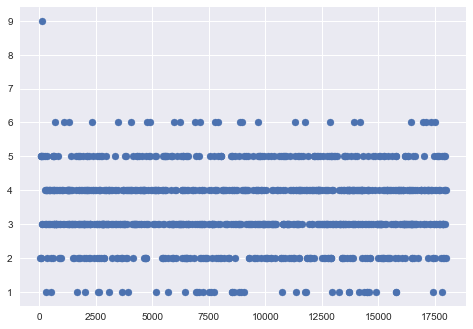

In [29]:
x = whodid['Household Size']
y = whodid['Customer Number']
plt.scatter(y,x)
plt.show()


#seems average balance 760 - 1500
#seems household size 3- 5

In [30]:
#wedid = whodid[['Household Size','Average Balance']]
#wedid.groupby('Household Size').filter(lambda x : x ['Household Size'].mean() >= 3)
#wedid.groupby('Average Balance').filter(lambda x : x ['Average Balance'].mean() >= 1000)
#x = wedid['Household Size'].filter(lambda x : x ['Household Size'].mean() >= 3)
#y = wedid['Average Balance']
#plt.scatter(y,x)
#plt.show()

#mask = (flight_data_finalcopy["ArrDelay"] > 0) & 
#        (flight_data_finalcopy["WeatherDelay"]>0)
#arrival_delayed_weather_filter=flight_data_finalcopy.ix[mask, ["UniqueCarrier","AirlineID"]]



#wedid = (whodid["Household Size"] >= 3) & (whodid["Average Balance"] >= 760 ) 
#wedid1 = (whodid["Household Size"] <= 9) & (whodid["Average Balance"] <= 1500) 




#wedid = whodid[['Household Size','Average Balance']]
#wedid.groupby('Average Balance').filter(lambda x : x ['Household Size'].mean() >= 3) &
#filter(lambda x : x ['Average Balance'].mean() >= 750)

#wedid = (whodid["Household Size"] >= 3) & (whodid["Average Balance"] >= 760 ) 
#wedid.groupby('Household Size').filter(lambda x : x ['Household Size'].mean() >= 3)


wedid = whodid.groupby('Household Size').filter(lambda x : x ['Household Size'].max() >= 3)
wedid1 = wedid.groupby('Average Balance').filter(lambda x : x ['Average Balance'].max() >= 760)
wedid2 = wedid1.groupby('Household Size').filter(lambda x : x ['Household Size'].max() <= 5)
wedid3 = wedid2.groupby('Average Balance').filter(lambda x : x ['Average Balance'].max() <= 1500)
#wedid1 = whodid[['Household Size','Average Balance']] wedid.groupby('Average Balance').filter(lambda x : x ['Average Balance'].mean() >= 750)

In [31]:
wedid3new = yesoffer[['Reward','Credit Cards Held','Offer Accepted','Mailer Type','Income Level','Credit Rating','Household Size','Average Balance']]

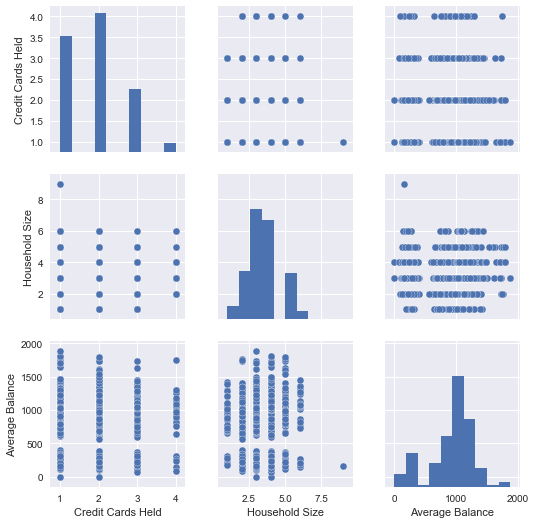

In [32]:
sns.pairplot(wedid3new);

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Naeemah\Anaconda3\py\lib\site-packages\matplotlib\contour.py:960: UserWarning:

The following kwargs were not used by contour: 'label', 'color'



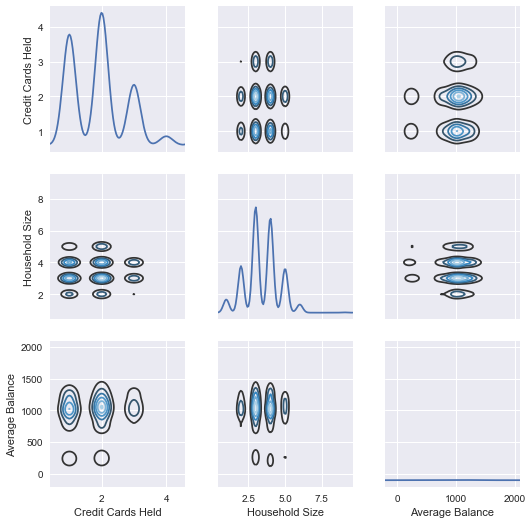

In [33]:
g = sns.PairGrid(wedid3new)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [34]:
#display(wedid3)

#x = wedid3new['Household Size']
#y = wedid3new['Income Level']
#plt.scatter(x,y)
#plt.show()


#households with 3,4,5 people with an average balance of 800 -1500 will say yes

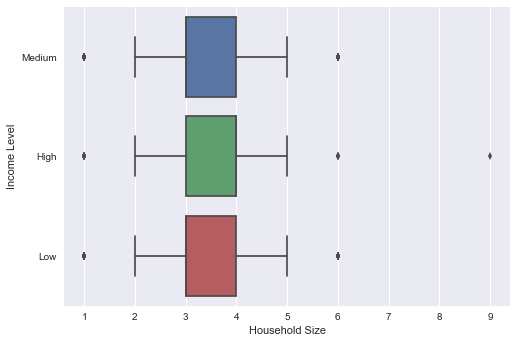

In [35]:
x = wedid3new['Household Size']
y = wedid3new['Income Level']
sns.boxplot(x,y)

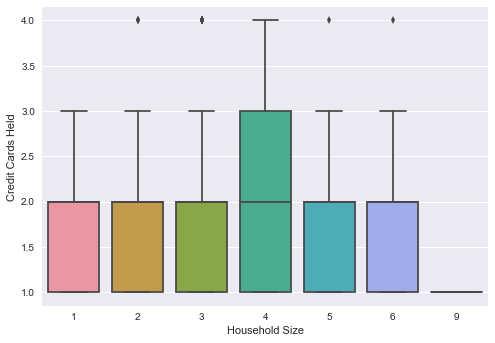

In [36]:
x = wedid3new['Credit Cards Held']
y = wedid3new['Household Size']
sns.boxplot(y,x)

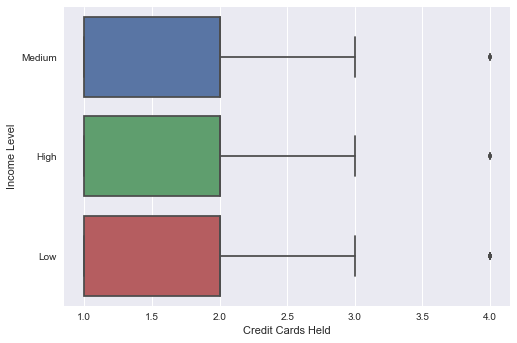

In [37]:
x = wedid3new['Credit Cards Held']
y = wedid3new['Income Level']
sns.boxplot(x,y)

C:\Users\Naeemah\Anaconda3\py\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



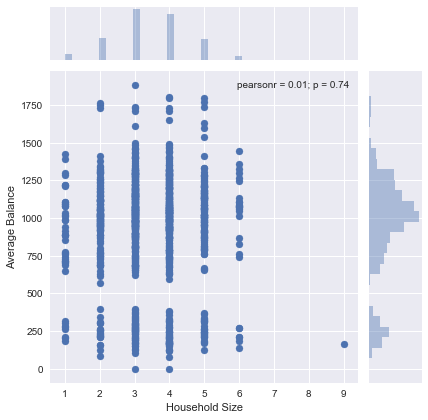

In [38]:
x = wedid3new['Household Size']
y = wedid3new['Average Balance']
sns.jointplot(x, y);

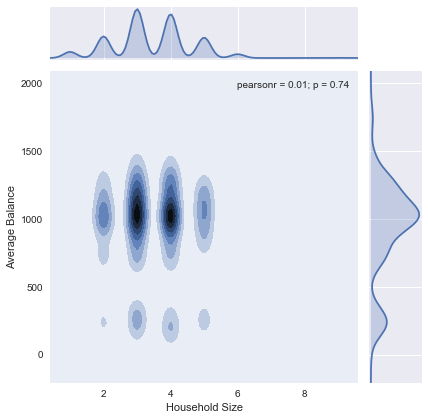

In [39]:
x = wedid3new['Household Size']
y = wedid3new['Average Balance']
sns.jointplot(x, y,kind="kde");

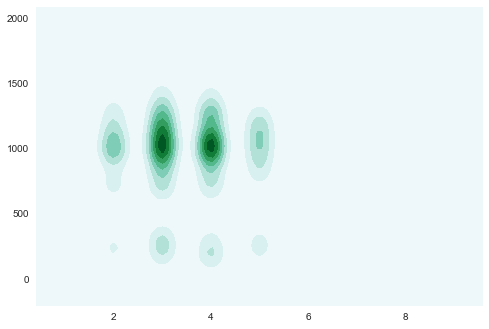

In [40]:
weme = wedid3new[['Household Size','Average Balance']]
sns.kdeplot(weme, shade=True);

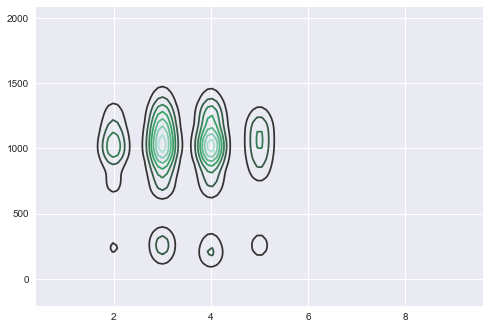

In [41]:
weme = wedid3new[['Household Size','Average Balance']]
sns.kdeplot(weme, shade=False);

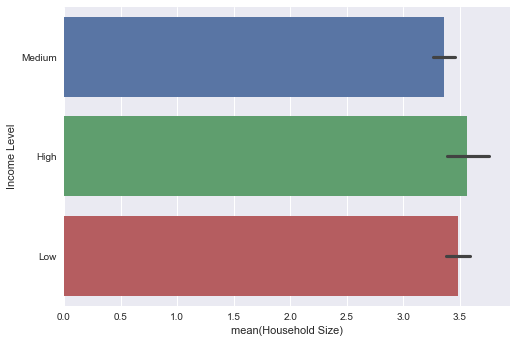

In [42]:
x = wedid3new['Household Size']
y = wedid3new['Income Level']
sns.barplot(x, y);

In [43]:
#good dataset
#households with 3,4,5 people with an average balance of 800 -1500 will say yes
#what offers 

display(wedid3new)

,Reward,Credit Cards Held,Offer Accepted,Mailer Type,Income Level,Credit Rating,Household Size,Average Balance
0,Air Miles,1,Yes,Letter,Medium,Low,2,769.50
1,Air Miles,2,Yes,Postcard,High,Low,5,851.25
2,Air Miles,2,Yes,Postcard,Low,High,2,931.75
3,Air Miles,1,Yes,Postcard,Low,Medium,2,1192.75
4,Cash Back,2,Yes,Postcard,High,Low,5,1329.50
5,Cash Back,1,Yes,Postcard,Medium,Low,5,908.50
6,Points,3,Yes,Letter,Low,Low,3,1454.50
7,Points,1,Yes,Postcard,High,Low,9,161.50
8,Air Miles,2,Yes,Letter,High,High,5,1082.50
9,Air Miles,2,Yes,Postcard,High,Medium,3,811.50


In [44]:
#import matplotlib.pyplot as plt
#ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("Hour", fontsize=12)
#ax.set_ylabel("V", fontsize=12)
#plt.show()

#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)
#ax1.set_xlabel('Reward')
#ax1.set_ylabel('Sum of Sales')
#ax1.set_title("Gender wise Sum of Sales")
#gonea.plot(kind='bar')

gonea = wedid3new[['Reward','Income Level']].groupby('Reward')

gonea.size()


Reward
Air Miles    465
Cash Back    206
Points       352
dtype: int64

In [45]:
goneb = wedid3new[['Reward','Income Level']].groupby('Income Level')
goneb.size()

Income Level
High      165
Low       388
Medium    470
dtype: int64

In [46]:
#x = gonea['Reward']
#y = gonea['Average Balance']
#sns.kdeplot(x, y);
#sns.distplot(gonea, shade=False)


#sns.pairplot(y)

#clustme = wedid3new[['Reward','Average Balance']]
#sns.clustermap(clustme)

#g = sns.pairplot(clustme, hue="Average Balance", palette="Set2", diag_kind="kde", size=3) 


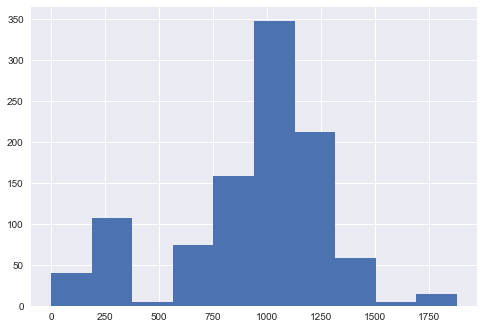

In [47]:
#gonea.plot(kind= 'hist')




Rewards = wedid3new['Average Balance'].hist()
#Rewards.set_title("Rewards")
#purchase_plot.set_xlabel("Order Amount($)")
#purchase_plot.set_ylabel("Number of orders")

In [48]:
#gonea.plot(kind= 'hist')

In [49]:
#Targets --- Air Miles -- 950, Air Miles -- 1100
#Targets --- Cash Back --- 950
#Targets ----- points --- 1000

In [50]:
#income and credit 
#display(wedid3)
#incda.size()


incda = wedid3new[['Reward','Credit Cards Held']].groupby('Credit Cards Held')
#incdb = wedid3[['Reward','Income Level']].groupby('Reward')
incda.size()





Credit Cards Held
1    362
2    434
3    198
4     29
dtype: int64

In [51]:
incda = wedid3new[['Reward','Income Level']].groupby('Income Level')
#incdb = wedid3[['Reward','Income Level']].groupby('Reward')
incda.size()


Income Level
High      165
Low       388
Medium    470
dtype: int64

In [52]:
incda = wedid3new[['Reward','Credit Rating']].groupby('Credit Rating')
#incdb = wedid3[['Reward','Income Level']].groupby('Reward')
incda.size()

Credit Rating
High      119
Low       633
Medium    271
dtype: int64

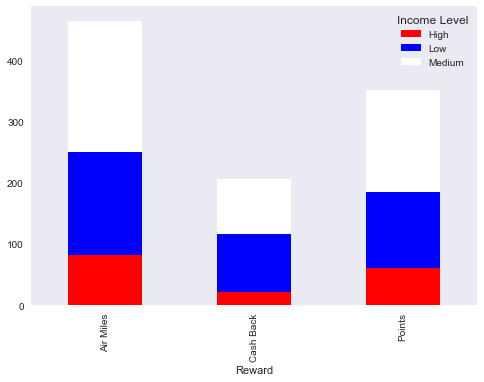

In [53]:
#var = wedid3.groupby(['Reward','Income Level']).max()
#var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


income = wedid3new[['Reward','Income Level','Average Balance']]
var = income.groupby(['Reward','Income Level'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','white'], grid=False)

In [54]:
#incda = wedid3[['Reward','Income Level']].groupby('Income Level')
incdb = wedid3new[['Reward','Income Level']].groupby('Reward')
incdb.size()

Reward
Air Miles    465
Cash Back    206
Points       352
dtype: int64

In [55]:
getcard = wedid3new[['Mailer Type','Income Level']].groupby('Mailer Type')         
getcard.describe()

#Customer Number

#getcard1 = wedid3[['Mailer Type','Income Level']].groupby('Mailer Type')         
#getcard1.size()

Income Level                    
                   count unique     top freq
Mailer Type                                 
Letter               300      3  Medium  139
Postcard             723      3  Medium  331

In [56]:
getcard1 = wedid3[['Mailer Type','Income Level']].groupby('Mailer Type')         
getcard1.describe()

Income Level                    
                   count unique     top freq
Mailer Type                                 
Letter               175      3  Medium   77
Postcard             442      3  Medium  198

In [57]:
getcard1 = wedid3[['Mailer Type','Credit Rating']].groupby('Mailer Type')         
getcard1.describe()

Credit Rating                 
                    count unique  top freq
Mailer Type                               
Letter                175      3  Low  111
Postcard              442      3  Low  273

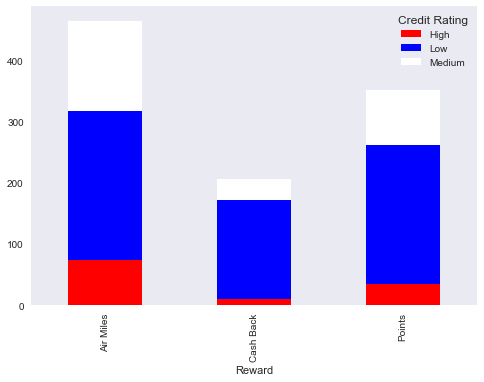

In [58]:
creditme = wedid3new[['Reward','Credit Rating','Average Balance']]
var = creditme.groupby(['Reward','Credit Rating'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','white'], grid=False)

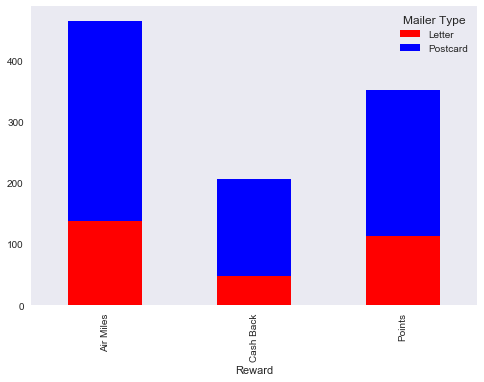

In [59]:
mailme = wedid3new[['Reward','Mailer Type','Average Balance']]
var = mailme.groupby(['Reward','Mailer Type'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

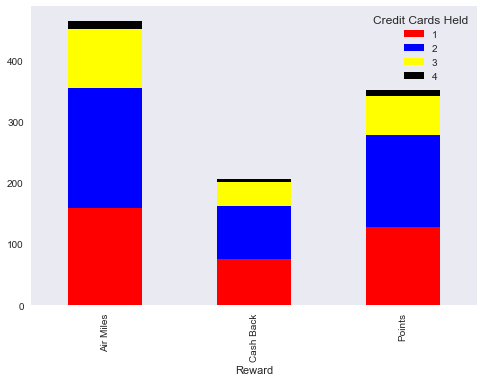

In [60]:
cardsown = wedid3new[['Reward','Credit Cards Held','Average Balance']]
var = cardsown.groupby(['Reward','Credit Cards Held'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','black'], grid=False)

# NO TO OFFERS 

1) Who would say no


2) Why would they say no


3) How did they get the information 

In [61]:
ccmarkno.dropna(axis=0)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25


In [62]:
ccmarkno.isnull().any()

Customer Number         False
Offer Accepted          False
Reward                  False
Mailer Type             False
Income Level            False
Bank Accounts Open      False
Overdraft Protection    False
Credit Rating           False
Credit Cards Held       False
Homes Owned             False
Household Size          False
Own Your Home           False
Average Balance         False
dtype: bool

In [63]:
nooffer = ccmarkno[['Customer Number','Reward','Offer Accepted','Mailer Type','Income Level','Bank Accounts Open','Credit Rating','Credit Cards Held','Homes Owned','Household Size','Own Your Home','Average Balance']]

In [64]:
nooffer.head(2)

,Customer Number,Reward,Offer Accepted,Mailer Type,Income Level,Bank Accounts Open,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance
0,1,Air Miles,No,Letter,High,1,High,2,1,4,No,1160.75
1,2,Air Miles,No,Letter,Medium,1,Medium,2,2,5,Yes,147.25


In [65]:
pd.DataFrame(nooffer, index =[0])

,Customer Number,Reward,Offer Accepted,Mailer Type,Income Level,Bank Accounts Open,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance
0,1,Air Miles,No,Letter,High,1,High,2,1,4,No,1160.75


In [66]:
rewardsno = nooffer[['Customer Number','Reward','Income Level','Credit Rating','Credit Cards Held','Household Size','Own Your Home','Average Balance']]

In [67]:
cardsno = nooffer[['Customer Number','Credit Cards Held','Homes Owned','Household Size','Average Balance']]

In [68]:
incomeno = nooffer[['Customer Number','Income Level','Credit Rating','Average Balance']]

In [69]:
creditno = nooffer[['Customer Number','Income Level','Credit Rating']]

In [70]:
rewardincomeno = nooffer[['Customer Number','Reward','Income Level','Credit Rating']]

In [71]:
whodidno = nooffer[['Customer Number','Reward','Credit Cards Held','Offer Accepted','Mailer Type','Income Level','Credit Rating','Household Size','Average Balance']]

In [72]:
rewardsno.describe()

,Customer Number,Credit Cards Held,Household Size,Average Balance
count,16977.000000,16977.000000,16977.000000,16977.000000
mean,9001.872828,1.903929,3.502562,939.629675
std,5189.520757,0.796445,1.113444,351.812987
min,1.000000,1.000000,1.000000,0.000000
25%,4517.000000,1.000000,3.000000,786.250000
50%,8994.000000,2.000000,3.000000,1006.500000
75%,13492.000000,2.000000,4.000000,1153.000000
max,18000.000000,4.000000,8.000000,3366.250000


In [73]:
cardsno.describe()

,Customer Number,Credit Cards Held,Homes Owned,Household Size,Average Balance
count,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000
mean,9001.872828,1.903929,1.203511,3.502562,939.629675
std,5189.520757,0.796445,0.427596,1.113444,351.812987
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4517.000000,1.000000,1.000000,3.000000,786.250000
50%,8994.000000,2.000000,1.000000,3.000000,1006.500000
75%,13492.000000,2.000000,1.000000,4.000000,1153.000000
max,18000.000000,4.000000,3.000000,8.000000,3366.250000


In [74]:
incomeno.describe()

,Customer Number,Average Balance
count,16977.000000,16977.000000
mean,9001.872828,939.629675
std,5189.520757,351.812987
min,1.000000,0.000000
25%,4517.000000,786.250000
50%,8994.000000,1006.500000
75%,13492.000000,1153.000000
max,18000.000000,3366.250000


In [75]:
rewardincomeno.describe()

,Customer Number
count,16977.000000
mean,9001.872828
std,5189.520757
min,1.000000
25%,4517.000000
50%,8994.000000
75%,13492.000000
max,18000.000000


In [76]:
nooffer.dtypes

Customer Number         int64
Reward                 object
Offer Accepted         object
Mailer Type            object
Income Level           object
Bank Accounts Open      int64
Credit Rating          object
Credit Cards Held       int64
Homes Owned             int64
Household Size          int64
Own Your Home          object
Average Balance       float64
dtype: object

In [77]:
display(whodidno)

,Customer Number,Reward,Credit Cards Held,Offer Accepted,Mailer Type,Income Level,Credit Rating,Household Size,Average Balance
0,1,Air Miles,2,No,Letter,High,High,4,1160.75
1,2,Air Miles,2,No,Letter,Medium,Medium,5,147.25
2,3,Air Miles,2,No,Postcard,High,Medium,2,276.50
3,4,Air Miles,1,No,Letter,Medium,High,4,1219.00
4,5,Air Miles,2,No,Letter,Medium,Medium,6,1211.00
5,6,Air Miles,3,No,Letter,Medium,High,4,1114.75
6,7,Air Miles,2,No,Letter,Medium,Medium,3,283.75
7,8,Cash Back,4,No,Postcard,Low,Medium,4,278.50
8,9,Air Miles,2,No,Postcard,Medium,Low,4,1005.00
9,10,Air Miles,3,No,Letter,High,Low,4,974.25


In [78]:
#whodidno.dropna(axis=0)
whodidno.groupby('Household Size').max()
whodidno.groupby('Average Balance').max()

,Customer Number,Reward,Credit Cards Held,Offer Accepted,Mailer Type,Income Level,Credit Rating,Household Size
Average Balance,,,,,,,,
0.00,17105,Points,3,No,Postcard,Medium,Medium,5
48.25,5711,Points,1,No,Postcard,Medium,Medium,4
56.00,2793,Points,3,No,Letter,Medium,Low,4
62.00,13320,Cash Back,3,No,Letter,High,Medium,3
63.50,11277,Points,1,No,Postcard,Medium,High,5
71.25,5149,Air Miles,3,No,Postcard,Medium,High,4
74.50,12909,Cash Back,1,No,Letter,High,Medium,2
75.25,13160,Cash Back,2,No,Postcard,Medium,Low,3
76.25,6707,Cash Back,1,No,Letter,Low,Low,4


In [79]:
display(whodidno)

,Customer Number,Reward,Credit Cards Held,Offer Accepted,Mailer Type,Income Level,Credit Rating,Household Size,Average Balance
0,1,Air Miles,2,No,Letter,High,High,4,1160.75
1,2,Air Miles,2,No,Letter,Medium,Medium,5,147.25
2,3,Air Miles,2,No,Postcard,High,Medium,2,276.50
3,4,Air Miles,1,No,Letter,Medium,High,4,1219.00
4,5,Air Miles,2,No,Letter,Medium,Medium,6,1211.00
5,6,Air Miles,3,No,Letter,Medium,High,4,1114.75
6,7,Air Miles,2,No,Letter,Medium,Medium,3,283.75
7,8,Cash Back,4,No,Postcard,Low,Medium,4,278.50
8,9,Air Miles,2,No,Postcard,Medium,Low,4,1005.00
9,10,Air Miles,3,No,Letter,High,Low,4,974.25


In [80]:
whodidno.describe()

,Customer Number,Credit Cards Held,Household Size,Average Balance
count,16977.000000,16977.000000,16977.000000,16977.000000
mean,9001.872828,1.903929,3.502562,939.629675
std,5189.520757,0.796445,1.113444,351.812987
min,1.000000,1.000000,1.000000,0.000000
25%,4517.000000,1.000000,3.000000,786.250000
50%,8994.000000,2.000000,3.000000,1006.500000
75%,13492.000000,2.000000,4.000000,1153.000000
max,18000.000000,4.000000,8.000000,3366.250000


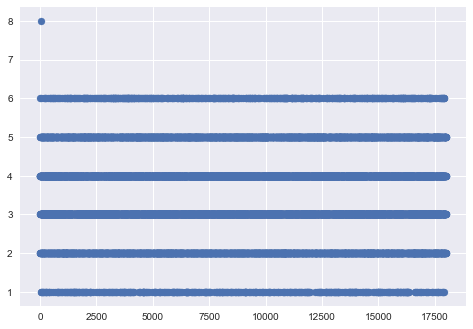

In [81]:
x = whodidno['Household Size']
y = whodidno['Customer Number']
plt.scatter(y,x)
plt.show()


#seems average balance 500 - 2000
#seems household size 1-6

In [82]:
#wedid = whodid[['Household Size','Average Balance']]
#wedid.groupby('Household Size').filter(lambda x : x ['Household Size'].mean() >= 3)
#wedid.groupby('Average Balance').filter(lambda x : x ['Average Balance'].mean() >= 1000)
#x = wedid['Household Size'].filter(lambda x : x ['Household Size'].mean() >= 3)
#y = wedid['Average Balance']
#plt.scatter(y,x)
#plt.show()

#mask = (flight_data_finalcopy["ArrDelay"] > 0) & 
#        (flight_data_finalcopy["WeatherDelay"]>0)
#arrival_delayed_weather_filter=flight_data_finalcopy.ix[mask, ["UniqueCarrier","AirlineID"]]



#wedid = (whodid["Household Size"] >= 3) & (whodid["Average Balance"] >= 760 ) 
#wedid1 = (whodid["Household Size"] <= 9) & (whodid["Average Balance"] <= 1500) 




#wedid = whodid[['Household Size','Average Balance']]
#wedid.groupby('Average Balance').filter(lambda x : x ['Household Size'].mean() >= 3) &
#filter(lambda x : x ['Average Balance'].mean() >= 750)

#wedid = (whodid["Household Size"] >= 3) & (whodid["Average Balance"] >= 760 ) 
#wedid.groupby('Household Size').filter(lambda x : x ['Household Size'].mean() >= 3)

#seems average balance 500 - 1500
#seems household size 1-6


wedidnot = whodidno.groupby('Household Size').filter(lambda x : x ['Household Size'].max() >= 1)
wedidnot1 = wedidnot.groupby('Average Balance').filter(lambda x : x ['Average Balance'].max() >= 500)
wedidnot2 = wedidnot1.groupby('Household Size').filter(lambda x : x ['Household Size'].max() <= 6)
wedidnot3 = wedidnot2.groupby('Average Balance').filter(lambda x : x ['Average Balance'].max() <= 2000)
#wedid1 = whodid[['Household Size','Average Balance']] wedid.groupby('Average Balance').filter(lambda x : x ['Average Balance'].mean() >= 750)

In [83]:
wedidnot3new = nooffer[['Reward','Credit Cards Held','Offer Accepted','Mailer Type','Income Level','Credit Rating','Household Size','Average Balance']]

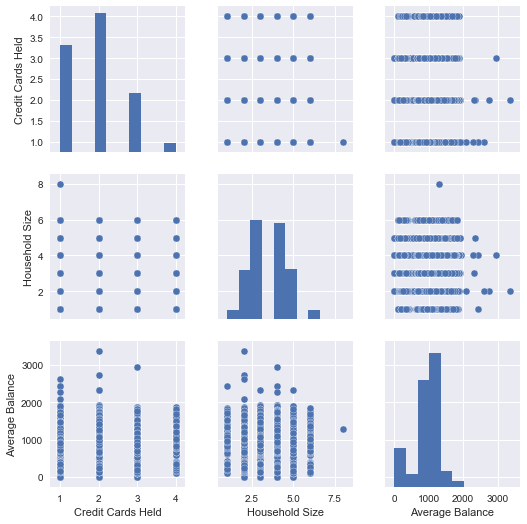

In [ ]:
sns.pairplot(wedidnot3new);

In [ ]:
g = sns.PairGrid(wedidnot3new)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Naeemah\Anaconda3\py\lib\site-packages\matplotlib\contour.py:960: UserWarning:

The following kwargs were not used by contour: 'label', 'color'



In [ ]:
#display(wedidnot3)

x = wedidnot3new['Household Size']
y = wedidnot3new['Income Level']
sns.boxplot(x,y)


#households with 3,4,5 people with an average balance of 800 -1500 will say yes

In [ ]:
x = wedidnot3new['Household Size']
y = wedidnot3new['Income Level']
sns.boxplot(x,y)

In [ ]:
x = wedidnot3new['Credit Cards Held']
y = wedidnot3new['Income Level']
sns.boxplot(y,x)

In [ ]:
x = wedidnot3new['Credit Cards Held']
y = wedidnot3new['Income Level']
sns.boxplot(x,y)

In [ ]:
x = wedidnot3new['Household Size']
y = wedidnot3new['Average Balance']
sns.jointplot(x, y);

In [ ]:
x = wedidnot3new['Household Size']
y = wedidnot3new['Average Balance']
sns.jointplot(x, y,kind="kde");

In [ ]:
weme = wedidnot3new[['Household Size','Average Balance']]
sns.kdeplot(weme, shade=True);

In [ ]:
weme = wedidnot3new[['Household Size','Average Balance']]
sns.kdeplot(weme, shade=False);

In [ ]:
x = wedidnot3new['Household Size']
y = wedidnot3new['Income Level']
sns.barplot(x, y);

In [ ]:
gonea = wedidnot3new[['Reward','Income Level']].groupby('Reward')
gonea.size()

In [ ]:
goneb = wedidnot3new[['Reward','Income Level']].groupby('Income Level')
goneb.size()

In [ ]:
incda = wedidnot3new[['Reward','Credit Cards Held']].groupby('Credit Cards Held')
#incdb = wedid3[['Reward','Income Level']].groupby('Reward')
incda.size()

In [ ]:
incda = wedidnot3new[['Reward','Income Level']].groupby('Income Level')
#incdb = wedid3[['Reward','Income Level']].groupby('Reward')
incda.size()

In [ ]:
incda = wedidnot3new[['Reward','Credit Rating']].groupby('Credit Rating')
#incdb = wedid3[['Reward','Income Level']].groupby('Reward')
incda.size()

In [ ]:
#x = gonea['Reward']
#y = gonea['Average Balance']
#sns.kdeplot(x, y);
#sns.distplot(gonea, shade=False)


#sns.pairplot(y)

clustme = wedidnot3new[['Credit Cards Held','Average Balance']]
#sns.clustermap(clustme)

g = sns.pairplot(clustme, hue="Credit Cards Held", palette="Set2", diag_kind="kde", size=3) 

In [ ]:
#var = wedid3.groupby(['Reward','Income Level']).max()
#var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


income = wedidnot3new[['Reward','Income Level','Average Balance']]
var = income.groupby(['Reward','Income Level'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','white'], grid=False)

In [ ]:
#incda = wedid3[['Reward','Income Level']].groupby('Income Level')
incdb = wedidnot3new[['Reward','Income Level']].groupby('Reward')
incdb.size()

In [ ]:
getcard = wedidnot3new[['Mailer Type','Average Balance']].groupby('Mailer Type')         
getcard.describe()

#Customer Number

#getcard1 = wedid3[['Mailer Type','Income Level']].groupby('Mailer Type')         
#getcard1.size()

In [ ]:
getcard1 = wedidnot3new[['Mailer Type','Income Level']].groupby('Mailer Type')         
getcard1.describe()

In [ ]:
creditme = wedidnot3new[['Reward','Credit Rating','Average Balance']]
var = creditme.groupby(['Reward','Credit Rating'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','white'], grid=False)

In [ ]:
mailme = wedidnot3new[['Reward','Mailer Type','Average Balance']]
var = mailme.groupby(['Reward','Mailer Type'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

In [ ]:
cardsown = wedidnot3new[['Reward','Credit Cards Held','Average Balance']]
var = cardsown.groupby(['Reward','Credit Cards Held'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','black'], grid=False)

In [ ]:
#good dataset
#households with 3,4,5 people with an average balance of 800 -1500 will say yes
#what offers 

display(wedidnot3new)

In [ ]:
#import matplotlib.pyplot as plt
#ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("Hour", fontsize=12)
#ax.set_ylabel("V", fontsize=12)
#plt.show()

#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)
#ax1.set_xlabel('Reward')
#ax1.set_ylabel('Sum of Sales')
#ax1.set_title("Gender wise Sum of Sales")
#gonea.plot(kind='bar')

gonenota = wedidnot3new[['Reward','Average Balance']].groupby('Reward')
gonenota.size()

In [ ]:
#gonea.plot(kind= 'hist')




Rewarsnot = gonenota['Average Balance'].hist()
#Rewards.set_title("Rewards")
#purchase_plot.set_xlabel("Order Amount($)")
#purchase_plot.set_ylabel("Number of orders")

In [ ]:
gonenota.plot(kind= 'hist')

In [ ]:
incdnota = wedidnot3new[['Reward','Income Level']].groupby('Income Level')
#incdb = wedidnot3[['Reward','Income Level']].groupby('Reward')
incdnota.size()

In [ ]:
#var = wedid3.groupby(['Reward','Income Level']).max()
#var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


incomenot = wedidnot3new[['Reward','Income Level','Average Balance']]
var = incomenot.groupby(['Reward','Income Level'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','black'], grid=False)

In [ ]:
#incda = wedid3[['Reward','Income Level']].groupby('Income Level')
incdbnot = wedidnot3new[['Reward','Income Level']].groupby('Reward')
incdbnot.size()

In [ ]:
#ccount = wedidnot3[['Reward','Average Balance']].groupby('Reward')

In [ ]:
creditmenot = wedidnot3new[['Reward','Credit Rating','Average Balance']]
var = creditmenot.groupby(['Reward','Credit Rating'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','black'], grid=True)

In [ ]:
mailmenot = wedidnot3new[['Reward','Mailer Type','Average Balance']]
var = mailmenot.groupby(['Reward','Mailer Type'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=True)

In [ ]:
#cardsownno = wedidnot3[['Reward','Credit Cards Held','Average Balance']]

In [ ]:
#cardsownno[['Reward','Credit Cards Held','Average Balance']].groupby('Reward')

In [ ]:
#display(cardsownno)

In [ ]:
cardsownno = wedidnot3new[['Reward','Credit Cards Held','Average Balance']]
var = cardsownno.groupby(['Reward','Credit Cards Held'])['Average Balance'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','black'], grid=True)

# YES and NO


In [ ]:
#g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
#g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
#for ax in g.axes.flat:
  #  ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
#g.set(xlim=(0, 60), ylim=(0, 14));




#g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
#g.map(qqplot, "total_bill", "tip")
#g.add_legend();

#yes and no to rewards
#yes and no to many cards
#yes and not to average balance

#display(wedid3)
#display(wedidnot3)


did1 = pd.DataFrame(wedid3, columns=['Income Level','Credit Rating'])
didnot1 = pd.DataFrame(wedidnot3, columns=['Income Level','Credit Rating'])
did1['Key'] = 'Yes to Offer'
didnot1['Key'] = 'No to Offer'
DF = pd.concat([did1, didnot1], keys=['Yes to Offer', 'No to Offer'])
DFGroup = DF.groupby(['Income Level','Key'])
DFGPlot = DFGroup.count().unstack('Key').plot(kind='bar')

In [ ]:
#display(wedid3)
#display(wedidnot3)





did2 = pd.DataFrame(wedid3, columns=['Credit Cards Held','Average Balance'])
didnot2 = pd.DataFrame(wedidnot3, columns=['Credit Cards Held','Average Balance'])
did2['Key'] = 'Yes to Offer'
didnot2['Key'] = 'No to Offer'
DF = pd.concat([did2, didnot2], keys=['Yes to Offer', 'No to Offer'])
DFGroup = DF.groupby(['Credit Cards Held','Key'])
DFGPlot = DFGroup.count().unstack('Key').plot(kind='bar')

In [ ]:
#display(wedid3)
#display(wedidnot3)





did3 = pd.DataFrame(wedid3, columns=['Credit Cards Held','Income Level','Average Balance'])
didnot3 = pd.DataFrame(wedidnot3, columns=['Credit Cards Held','Income Level','Average Balance'])
did3['Key'] = 'Yes to Offer'
didnot3['Key'] = 'No to Offer'
DF = pd.concat([did3, didnot3], keys=['Yes to Offer', 'No to Offer'])
DFGroup = DF.groupby(['Income Level','Key'])
DFGPlot = DFGroup.count().unstack('Key').plot(kind='bar')

In [ ]:
#display(wedid3)
#display(wedidnot3)





#did4 = pd.DataFrame(wedid3, columns=['Mailer Type','Reward','Income Level'])
#didnot4 = pd.DataFrame(wedidnot3, columns=['Mailer Type','Reward','Income Level','Average Balance'])
#did4['Key'] = 'Yes to Offer'
#didnot4['Key'] = 'No to Offer'
#DF = pd.concat([did4, didnot4], keys=['Yes to Offer', 'No to Offer'])
#DFGroup = DF.groupby(['Income Level','Key'])
##DFGPlot = DFGroup.count().unstack('Key').plot(kind='bar')
#DFGPlot = DFGroup.count().stack('Key').plot(kind='bar')

In [ ]:
#did5 = pd.DataFrame(wedid3, columns=['Mailer Type','Reward'])
#didnot5 = pd.DataFrame(wedidnot3, columns=['Mailer Type','Reward'])
#did5['Key'] = 'Yes to Offer'
#didnot5['Key'] = 'No to Offer'
#DF = pd.concat([did5, didnot5], keys=['Yes to Offer', 'No to Offer'])
#DFGroup = DF.groupby(['Reward','Key'])
#DFGPlot = DFGroup.count().unstack('Key').plot(kind='bar')

In [ ]:
#display(wedid3)

#wedid3new.hist()


In [ ]:
#wedidnot3new.hist()

In [ ]:
#wedid3.plot.scatter(x='Credit Cards Held', y='Average Balance')  

#wedidnot3.plot.scatter(x='Credit Cards Held', y='Average Balance')  

In [ ]:
#wedid3.hist()

# TEST

In [ ]:
wedid.head(2)

In [ ]:
Y1 = wedid['Credit Cards Held']
X1 = wedid['Average Balance']

X_train = X1[:-250]
X_test = X1[-250:]
Y_train = Y1[:-250]
Y_test = Y1[-250:]

plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Average Balance')
plt.ylabel('Credit Cards Held')
plt.xticks(())
plt.yticks(())
 
plt.show()



#  Clustering

In [ ]:
# Create linear regression object
#regr = linear_model.LinearRegression()
 
# Train the model using the training sets
#regr.fit(X_train, Y_train)
 
# Plot outputs
#plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

In [ ]:
#machine Learning  --- cluster
#Association Analysis
#Yes/No 
#based on num of credit cards, income level and average balance

In [ ]:
#machine Learning --- cluster
#Association Analysis
#Yes/No 
#based on mailer, income level, average balanc and household size

In [ ]:
ccmarkall.describe()

In [ ]:
ccmarkall.head()

In [ ]:
ccmarkall.isnull().any()

In [ ]:
cmall = pd.DataFrame(ccmarkall)
cmall

In [ ]:
cmallreg = pd.DataFrame(ccmarkall)
cmallreg

# Yes = 1 and No = 0

In [ ]:
def tran_offer(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [ ]:
cmallreg['offervalue'] = cmallreg['Offer Accepted'].apply(tran_offer)
cmallreg['offervalue'] = np.where(cmallreg['Offer Accepted']=='Yes', 1, 0)
mallreg

In [ ]:
#cmalyesno.display()

In [ ]:
#allsample = cmallreg[(cmallreg['Customer Number'] % 10) == 0]
cmallreg.shape

In [ ]:
cmallreg.describe().transpose()
#allsample.describe().transpose()

In [ ]:
#allsample[allsample['offervalue'] == 0].shape

In [ ]:
#allsample[allsample['Average Balance'] == 0].shape

In [ ]:
#del allsample['offervalue']
#del allsample['Average Balance']

In [ ]:
#rows_before = allsample.shape[0]
#allsample = allsample.dropna()
#rows_after = allsample.shape[0]

In [ ]:
#rows_before - rows_after

In [ ]:
cmallreg.columns

In [ ]:
features = ['Credit Cards Held','Average Balance','offervalue']

In [ ]:
selectme = cmallreg[features]

In [ ]:
selectme.columns

In [ ]:
X = StandardScaler().fit_transform(selectme)
X

So it seems that we need to focus on Average Balance, Credit Cards Held, Income Level.  Credit Ranking doesn't mean anything, since people want to keep a high credit ranking so they won;t get a credit card.  Number Homes Owned and Owned Your Home is a 50/50.  People getting a houe will not say yes to a offer because it may hurt their chances on getting a house.  People who own a house may or may not get a card.  People with more than one card may or may not get another card. It seems people do not collect cards just for the sake of cards.  

In [ ]:
kmeans = KMeans(n_clusters=36)
model = kmeans.fit(X)
print("model\n", model)

In [ ]:
print(model)

In [ ]:
centers = model.cluster_centers_
centers

In [ ]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [ ]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
P = pd_centers(features, centers)
P

In [ ]:
#parallel_plot(P[P['Average Balance'] > 0.1, P['Credit Cards Held'] > 0.1])
#parallel_plot(P)
parallel_plot(P[P['offervalue'] < 0.1])
#parallel_plot(P[(P['Average Balance'] < 0.1) & (P['Credit Cards Held'] < 0.2)])

In [ ]:
parallel_plot(P[P['offervalue'] > 0.1])

In [ ]:
N = 50
area = np.pi * (15 * np.random.rand(N))**2
x = P['Average Balance']
y = P['Credit Cards Held']
plt.scatter(x, y, s=area)
plt.show()

In [ ]:
N = 50
area = np.pi * (15 * np.random.rand(N))**2
x = P['Average Balance']
y = P['offervalue']
plt.scatter(x, y, s=area)
plt.show()

In [ ]:
N = 50
area = np.pi * (15 * np.random.rand(N))**2
plt.scatter(x, y, s=area)
x = P['Credit Cards Held']
y = P['offervalue']
plt.scatter(x, y, s=area)
plt.show()

In [ ]:
#x = P['Average Balance']
#y = P['Credit Cards Held']
#y = P['offervalue']
plt.hist(P['Credit Cards Held'])
plt.hist(P['Average Balance'])
plt.hist(P['offervalue'])
plt.show()

In [ ]:
plt.hist(P['Credit Cards Held'])
#plt.hist(P['Average Balance'])
#plt.hist(P['offervalue'])
plt.show()

In [ ]:
#plt.hist(P['Credit Cards Held'])
plt.hist(P['Average Balance'])
#plt.hist(P['offervalue'])
plt.show()

In [ ]:
#plt.hist(P['Credit Cards Held'])
#plt.hist(P['Average Balance'])
plt.hist(P['offervalue'])
plt.show()

# Classification

In [ ]:
ccmarkall.describe()

In [ ]:
ccmarkall.isnull().any()


In [ ]:
classmall = pd.DataFrame(ccmarkall)
classmall

# LETTER == 0 AND POSTCARD == 1

In [ ]:
def tran_offer(x):
    if x == 'Postcard':
        return 1
    if x == 'Letter':
        return 0

In [ ]:
classmall['mailtypevalue'] = classmall['Mailer Type'].apply(tran_offer)
classmall

# Air Miles == 0, Cash Back == 1 and Points == 2

In [ ]:
def tran_offer(x):
    if x == 'Air Miles':
        return 0
    if x == 'Cash Back':
        return 1
    if x == 'Points':
        return 2

In [ ]:
classmall['rewardvalue'] = classmall['Reward'].apply(tran_offer)
classmall

# Low == 0, Medium == 1 and High == 2

In [ ]:
def tran_offer(x):
    if x == 'Low':
        return 0
    if x == 'Medium':
        return 1
    if x == 'High':
        return 2

In [ ]:
classmall['incomelevelvalue'] = classmall['Income Level'].apply(tran_offer)
classmall

**LETTER == 0 AND POSTCARD == 1**

**Air Miles == 0, Cash Back == 1 and Points == 2**

**Low == 0, Medium == 1 and High == 2**

**Yes == 1 and No == 0**

In [ ]:
classmall.describe().transpose()

In [ ]:
#classme = classmall[['Average Balance','offervalue','mailtypevalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
#X = classmall[['Average Balance','offervalue','mailtypevalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
#X.columns


In [ ]:
#y = classmall['offervalue']
#y.columns

In [ ]:
X = classmall[['Average Balance','mailtypevalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
X.columns

In [ ]:
y = classmall[['offervalue']].copy()
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [ ]:
yesnoclassifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
yesnoclassifier.fit(X_train, y_train)

In [ ]:
type(yesnoclassifier)

In [ ]:
yesnoclassifier.fit(X_train, y_train)

In [ ]:
yesnoclass = yesnoclassifier.fit(X_train, y_train)

In [ ]:
predictions = yesnoclassifier.predict(X_test)

In [ ]:
predictions[:10]

In [ ]:
y_test['offervalue'][:10]

In [ ]:
accuracy_score(y_true = y_test, y_pred = predictions)
#help(accuracy_score)

# Regresssion

In [ ]:
features = classmall[['Average Balance','mailtypevalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
target = classmall['offervalue']

In [ ]:
X = features
y = target

In [ ]:
X.iloc[2]

In [ ]:
featuresx = classmall[['Average Balance','mailtypevalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
targetx = classmall['offervalue']

In [ ]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)

In [ ]:
dt.fit(featuresx,targetx)

In [ ]:
dt.fit

In [ ]:
plt.plot(X)

In [ ]:
plt.hist(X.iloc[2])

In [ ]:
plt.figure()

In [ ]:
plt.plot(featuresx,targetx)

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [ ]:
regressor = LinearRegression()
# Use logistic Regression
regressor.fit(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
predk = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, predk)

In [ ]:
X_train.head()

In [ ]:
y_prediction = regressor.predict(X_test)
y_prediction

In [ ]:
plt.hist(y_prediction)

In [ ]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [ ]:
print(RMSE)

In [ ]:
y_test.describe()

In [ ]:
print('Coefficients: \n', regressor.coef_)

In [ ]:
y_test.describe()

In [ ]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [ ]:
print(RMSE)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
m=reg.coef_[0]
b=reg.intercept_
print("slope=",m, "intercept=",b)

In [ ]:
#plt.hist(y_prediction)

In [ ]:
features = classmall[['Average Balance','mailtypevalue','offervalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
target = classmall['offervalue']

In [ ]:
classmall.head()

In [ ]:
decisionme = classmall[['Average Balance','mailtypevalue','offervalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
xx = decisionme[['Average Balance','mailtypevalue','rewardvalue','incomelevelvalue','Credit Cards Held']]

In [ ]:
yy = decisionme['offervalue']

In [ ]:
xxx = np.array(['xx'])

In [ ]:
yyy = np.array(['yy'])

In [ ]:
xerr = [0.01]*15
yerr = [0.001]*15

In [ ]:
plt.rc('font', family='serif', size=13)